# Importing Necessary Libraries

In [1]:
# to read the data
import os
import json
import gzip

from urllib.request import urlopen

# dataframe and series 
import pandas as pd
import numpy as np

# sklearn imports for modeling part
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import confusion_matrix

# Getting Data from json file

In [177]:
data = []
with gzip.open('Kindle_Store_5.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# to see the length of the data, it means total number of reviews also
print(len(data))

# to see the first row of the list
print(data[0])

2222983
{'overall': 4.0, 'verified': True, 'reviewTime': '07 3, 2014', 'reviewerID': 'A2LSKD2H9U8N0J', 'asin': 'B000FA5KK0', 'style': {'Format:': ' Kindle Edition'}, 'reviewerName': 'sandra sue marsolek', 'reviewText': 'pretty good story, a little exaggerated, but I liked it pretty well.  liked the characters, the plot..it had mystery, action, love, all of the main things. I think most western lovers would injoy this book', 'summary': 'pretty good story', 'unixReviewTime': 1404345600}


In [178]:
df = pd.DataFrame.from_dict(data) #convert dictionary to dataframe

In [201]:
df.to_csv('kindle_data.csv', index = False) # to use easily everytime, I write it to csv

# Getting Meta Data to Get More Information About Products

In [180]:
data_meta = []
with gzip.open('meta_Kindle_Store.json.gz') as f:
    for l in f:
        data_meta.append(json.loads(l.strip()))
    
# to see the length of the data, it means total number of products also
print(len(data_meta))

# to see the first row of the list
print(data_meta[0])

493552
{'category': ['Kindle Store', 'Kindle eBooks', 'Literature & Fiction'], 'tech1': '', 'description': [], 'fit': '', 'title': '', 'also_buy': [], 'image': [], 'tech2': '', 'brand': "Visit Amazon's Rama Bijapurkar Page", 'feature': [], 'rank': '1,857,911 Paid in Kindle Store (', 'also_view': [], 'main_cat': 'Buy a Kindle', 'similar_item': '', 'date': '', 'price': '', 'asin': '0143065971'}


In [181]:
df_meta = pd.DataFrame.from_dict(data_meta) #convert dictionary to dataframe

In [202]:
df_meta.to_csv('kindle_meta_last.csv', index = False) # to use easily everytime, I write it to csv

# Importing Data from .csv

In [5]:
df = pd.read_csv('kindle_data.csv', low_memory=False)

In [8]:
df_meta = pd.read_csv('kindle_meta_last.csv', low_memory=False)

In [10]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"07 3, 2014",A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},sandra sue marsolek,"pretty good story, a little exaggerated, but I...",pretty good story,1404345600,NaN,NaN
1,5.0,True,"05 26, 2014",A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},Tpl,"If you've read other max brand westerns, you k...",A very good book,1401062400,NaN,NaN
2,5.0,True,"09 16, 2016",A8WQ7MAG3HFOZ,B000FA5KK0,{'Format:': ' Kindle Edition'},Alverne F. Anderson,"Love Max, always a fun twist",Five Stars,1473984000,NaN,NaN
3,5.0,True,"03 3, 2016",A1E0MODSRYP7O,B000FA5KK0,{'Format:': ' Kindle Edition'},Jeff,"As usual for him, a good book",a good,1456963200,NaN,NaN
4,5.0,True,"09 10, 2015",AYUTCGVSM1H7T,B000FA5KK0,{'Format:': ' Kindle Edition'},DEHS - EddyRapcon,MB is one of the original western writers and ...,A Western,1441843200,2,NaN


In [12]:
df.shape

(2222983, 12)

In [17]:
df.isna().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style               52617
reviewerName          142
reviewText            410
summary              1757
unixReviewTime          0
vote              1931032
image             2221618
dtype: int64

Most important columns for my project are overall and reviewText. So I have to drop the nulls for these two columns.

In [19]:
df.dropna(subset=['reviewText'], inplace=True)

In [20]:
df.isna().sum() # to check

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style               52600
reviewerName          142
reviewText              0
summary              1735
unixReviewTime          0
vote              1930627
image             2221213
dtype: int64

# Deeper Look to Columns

In [28]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2222573 entries, 0 to 2222982
Data columns (total 12 columns):
overall           2222573 non-null float64
verified          2222573 non-null bool
reviewTime        2222573 non-null object
reviewerID        2222573 non-null object
asin              2222573 non-null object
style             2169973 non-null object
reviewerName      2222431 non-null object
reviewText        2222573 non-null object
summary           2220838 non-null object
unixReviewTime    2222573 non-null int64
vote              291946 non-null object
image             1360 non-null object
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 285.6+ MB


In [13]:
df['overall'].value_counts()

5.0    1353641
4.0     556324
3.0     197949
2.0      66898
1.0      48171
Name: overall, dtype: int64

In [21]:
df['verified'].value_counts()

True     1417690
False     804883
Name: verified, dtype: int64

In [39]:
df['reviewTime'].nunique()

4838

In [41]:
df["Date"] = pd.to_datetime(df["reviewTime"]) # convert to datetime
# df['week'] =df['Date'].dt.week
# df['month'] =df['Date'].dt.month 
# df['year'] =df['Date'].dt.year

In [40]:
df.groupby(['reviewerName','overall']).count()

verified  \
reviewerName                                       overall             
  nospin                                           3.0             2   
                                                   4.0             2   
                                                   5.0             2   
 2 Girls &amp;amp;amp; Their Kindles  (Lynsey A... 3.0             1   
                                                   4.0             4   
...                                                              ...   
~lil maso~                                         4.0            19   
                                                   5.0            28   
~~Dorothy~~                                        5.0            10   
~~barbie ~~                                        4.0             1   
                                                   5.0             7   

                                                            reviewTime  \
reviewerName                                       overall               
  nospin                                           3.0               2   
                                                   4.0               2   
                                                   5.0               2   
 2 Girls &amp;amp;amp; Their Kindles  (Lynsey A... 3.0               1   
                                                   4.0               4   
...                                                                ...   
~lil maso~                                         4.0              19   
                                                   5.0              28   
~~Dorothy~~                                        5.0              10   
~~barbie ~~                                        4.0               1   
                                                   5.0               7   

                                                            reviewerID  asin  \
reviewerName                                       overall                     
  nospin                                           3.0               2     2   
                                                   4.0               2     2   
                                                   5.0               2     2   
 2 Girls &amp;amp;amp; Their Kindles  (Lynsey A... 3.0               1     1   
                                                   4.0               4     4   
...                                                                ...   ...   
~lil maso~                                         4.0              19    19   
                                                   5.0              28    28   
~~Dorothy~~                                        5.0              10    10   
~~barbie ~~                                        4.0               1     1   
                                                   5.0               7     7   

                                                            style  reviewText  \
reviewerName                                       overall                      
  nospin                                           3.0          2           2   
                                                   4.0          2           2   
                                                   5.0          2           2   
 2 Girls &amp;amp;amp; Their Kindles  (Lynsey A... 3.0          1           1   
                                                   4.0          4           4   
...                                                           ...         ...   
~lil maso~                                         4.0         19          19   
                                                   5.0         28          28   
~~Dorothy~~                                        5.0          6          10   
~~barbie ~~                                        4.0          1           1   
                                                   5.0          7           7   

                                                            summa

In [199]:
df['reviewerName'].nunique()

102643

In [7]:
df['reviewText'][0]

'pretty good story, a little exaggerated, but I liked it pretty well.  liked the characters, the plot..it had mystery, action, love, all of the main things. I think most western lovers would injoy this book'

In [10]:
df = df.loc[:, ['reviewText', 'overall']]
df.head()

,reviewText,overall
0,"pretty good story, a little exaggerated, but I...",4.0
1,"If you've read other max brand westerns, you k...",5.0
2,"Love Max, always a fun twist",5.0
3,"As usual for him, a good book",5.0
4,MB is one of the original western writers and ...,5.0


In [12]:
df.shape

(2222983, 2)

In [111]:
df_trial = df.head(10000)

In [112]:
df_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
reviewText    9991 non-null object
overall       10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [113]:
df_trial['overall'] = df_trial['overall'].apply(np.int64)

/Users/ezgi/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
df_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
reviewText    9991 non-null object
overall       10000 non-null int64
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [115]:
df_trial.isna().sum()

reviewText    9
overall       0
dtype: int64

In [116]:
df_trial = df_trial.dropna()

In [118]:
df_trial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9991 entries, 0 to 9999
Data columns (total 2 columns):
reviewText    9991 non-null object
overall       9991 non-null int64
dtypes: int64(1), object(1)
memory usage: 234.2+ KB


In [119]:
def calc_sentiment(overall):
    if overall == 5:
        return 2
    elif overall == 4:
        return 2
    elif overall == 1 :
        return 0
    elif overall == 2 :
        return 0
    else:
        return 1

In [120]:
df_trial['sentiment'] = df_trial['overall'].apply(calc_sentiment)

In [121]:
df_trial['sentiment'].value_counts()

2    7993
1    1141
0     857
Name: sentiment, dtype: int64

In [41]:
from wordcloud import WordCloud, STOPWORDS

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

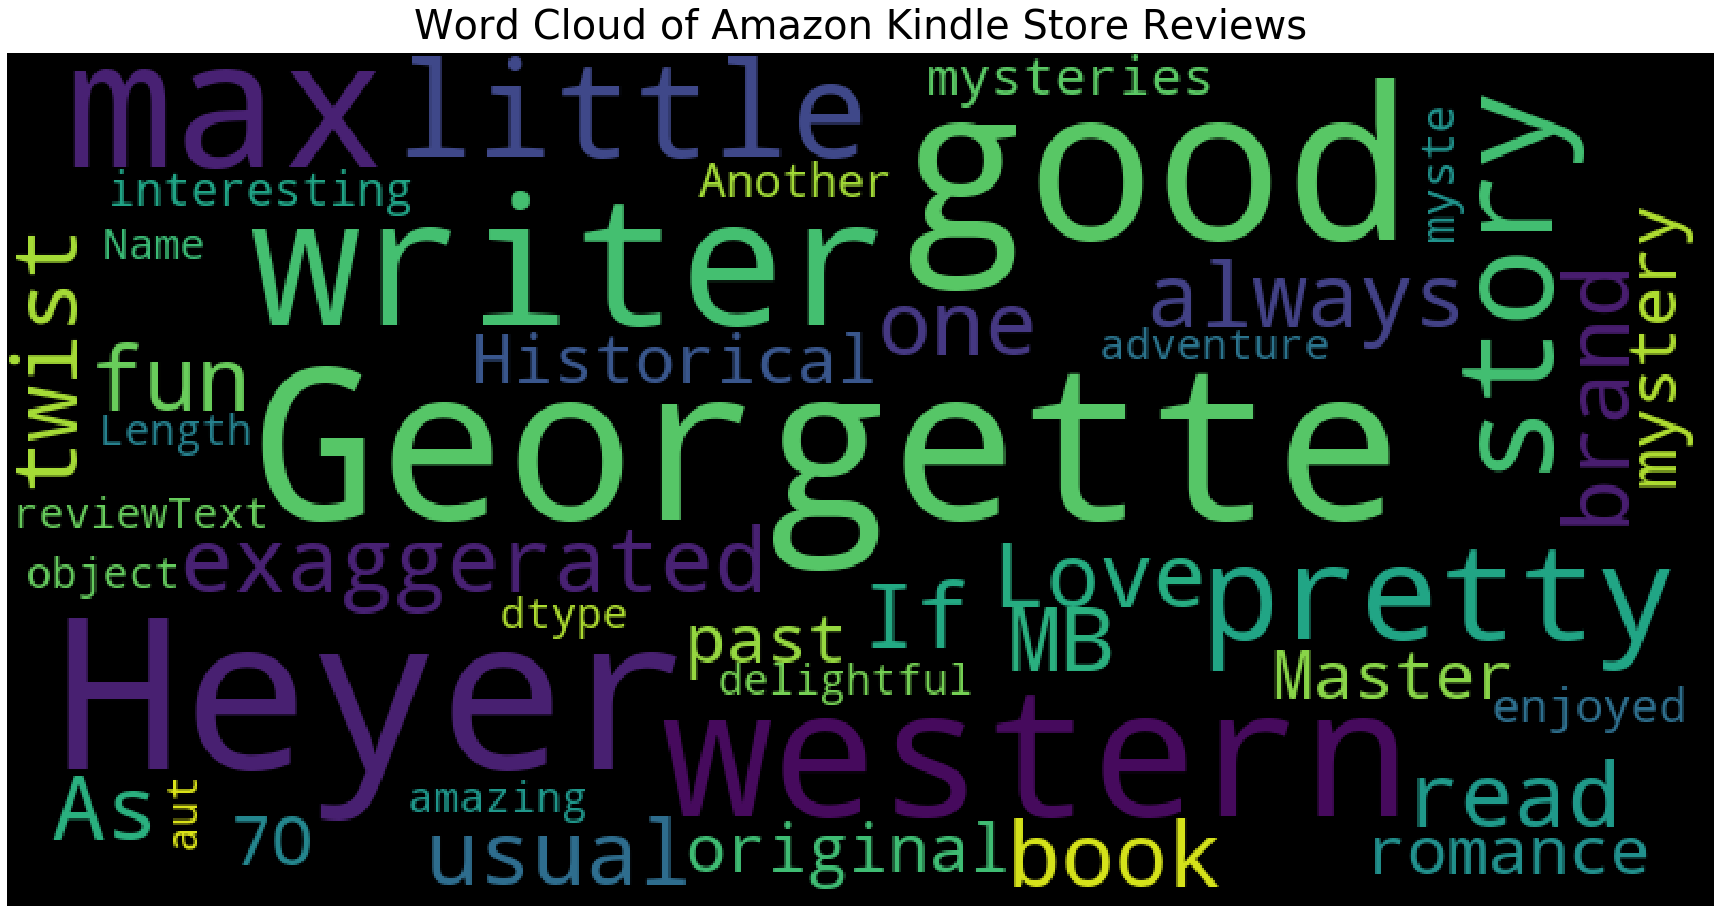

In [122]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df_trial['reviewText'], title="Word Cloud of Amazon Kindle Store Reviews")



In [123]:
stopwords = set(STOPWORDS)

In [124]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [143]:
def model(df) :
    X_train, X_test, y_train, y_test = train_test_split(df['reviewText'], 
                                                        df['sentiment'], test_size=0.2, random_state=42)
    print(X_train.shape)
    print(X_test.shape)
        
    word_vectorizer = TfidfVectorizer(
        sublinear_tf=True,
        strip_accents='unicode',
        analyzer='word',
        token_pattern=r'\w{1,}',
        stop_words='english',
        ngram_range=(1, 1),
        max_features=10000)

    word_vectorizer.fit(df['reviewText'])
    train_word_features = word_vectorizer.transform(X_train)
    test_word_features = word_vectorizer.transform(X_test)
     
    classifier = LogisticRegression(class_weight = "balanced", C=0.5, solver='sag')
    classifier.fit(train_word_features, y_train)
    
    y_pred_train = classifier.predict(train_word_features)
    y_pred = classifier.predict(test_word_features)
          
    print("Accuracy:"); print("="*len("Accuracy:"))
    print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {accuracy_score(y_test, y_pred)}")

    print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
    print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {balanced_accuracy_score(y_test, y_pred)}")
    
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)
    plt.show()

(7992,)
(1999,)
Accuracy:
TRAIN: 0.8845095095095095
TEST: 0.7983991995997999

Balanced Accuracy:
TRAIN: 0.9203877867707013
TEST: 0.6872216188272565


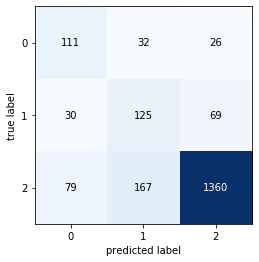

In [144]:
model(df_trial)

# LogReg with 10000 balanced target classes sampled

In [145]:
df['overall'] = df['overall'].apply(np.int64)

In [146]:
df['sentiment'] = df['overall'].apply(calc_sentiment)

In [147]:
df['sentiment'].value_counts()

2    1909965
1     197949
0     115069
Name: sentiment, dtype: int64

In [149]:
df_0 = df.loc[df['sentiment']==0].head(10000)

In [150]:
df_1 = df.loc[df['sentiment']==1].head(10000)

In [151]:
df_2 = df.loc[df['sentiment']==2].head(10000)

In [152]:
frames = [df_0, df_1, df_2]

df_trial_new = pd.concat(frames)

In [154]:
df_trial_new['sentiment'].value_counts()

2    10000
1    10000
0    10000
Name: sentiment, dtype: int64

In [166]:
df_trial_new = df_trial_new.dropna()

(23991,)
(5998,)
Accuracy:
TRAIN: 0.7844608394814723
TEST: 0.6958986328776259

Balanced Accuracy:
TRAIN: 0.7844072276092117
TEST: 0.6963028825222364


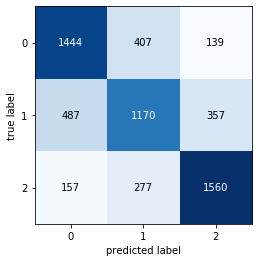

In [167]:
model(df_trial_new)

# Trial with 2-sentiments and torch from 

https://www.kaggle.com/lalwaniabhishek/abhishek-lalwani-bits-twitter-text

pre-trained model baseline 

In [67]:
def generate_bigrams(x):
    n_grams = set(zip(*[x[i:] for i in range(2)]))
    for n_gram in n_grams:
        x.append(' '.join(n_gram))
    return x

In [68]:
#Testing the method
generate_bigrams(['This', 'film', 'is', 'terrible'])

['This', 'film', 'is', 'terrible', 'film is', 'is terrible', 'This film']

In [71]:
import torch
from torchtext import data
from torchtext import datasets

In [72]:
import random

SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

TEXT = data.Field(preprocessing = generate_bigrams)
TARGET = data.LabelField(dtype = torch.float)

In [77]:
def calc_two_sentiment(overall):
    if overall >=3:
        return 1
    else:
        return 0

In [78]:
df_new = df.head(10000)

In [83]:
df_new.head()

,reviewText,overall
0,"pretty good story, a little exaggerated, but I...",4.0
1,"If you've read other max brand westerns, you k...",5.0
2,"Love Max, always a fun twist",5.0
3,"As usual for him, a good book",5.0
4,MB is one of the original western writers and ...,5.0


In [84]:
df_new['sentiments'] = df_new['overall'].apply(calc_two_sentiment)

/Users/ezgi/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
df_new['sentiments'].value_counts()

1    9143
0     857
Name: sentiments, dtype: int64

In [88]:
df_new

,reviewText,overall,sentiments
0,"pretty good story, a little exaggerated, but I...",4.0,1
1,"If you've read other max brand westerns, you k...",5.0,1
2,"Love Max, always a fun twist",5.0,1
3,"As usual for him, a good book",5.0,1
4,MB is one of the original western writers and ...,5.0,1
...,...,...,...
9995,Georgette Heyer is a past Master at Historical...,5.0,1
9996,Good mystery from a romance writer. I am 7O a...,5.0,1
9997,Georgette Heyer's mysteries have interesting c...,4.0,1
9998,I have enjoyed most of Georgette Heyer's myste...,3.0,1


In [90]:
df_new = df_new.drop(['overall'], axis=1)

In [91]:
fields_train = [('reviewText', TEXT),('sentiments', TARGET)]

In [92]:
df_new.to_csv('train.csv', index = False)

In [93]:
#Reading train.csv
train_data = data.TabularDataset(path = 'train.csv',
                                 format = 'csv',
                                 fields = fields_train,
                                 skip_header = True
)

In [94]:
print(vars(train_data[0]))

{'reviewText': ['pretty', 'good', 'story,', 'a', 'little', 'exaggerated,', 'but', 'I', 'liked', 'it', 'pretty', 'well.', 'liked', 'the', 'characters,', 'the', 'plot..it', 'had', 'mystery,', 'action,', 'love,', 'all', 'of', 'the', 'main', 'things.', 'I', 'think', 'most', 'western', 'lovers', 'would', 'injoy', 'this', 'book', 'main things.', 'but I', 'western lovers', 'plot..it had', 'it pretty', 'a little', 'mystery, action,', 'well. liked', 'pretty good', 'things. I', 'pretty well.', 'of the', 'characters, the', 'the main', 'this book', 'injoy this', 'exaggerated, but', 'liked it', 'the characters,', 'think most', 'good story,', 'lovers would', 'liked the', 'story, a', 'love, all', 'all of', 'little exaggerated,', 'I think', 'I liked', 'the plot..it', 'action, love,', 'would injoy', 'had mystery,', 'most western'], 'sentiments': '1'}


In [95]:
#Creating validation set
train_data, valid_data = train_data.split(random_state = random.seed(SEED))

In [96]:
#Getting the pre-trained word embeddings and building the vocab
MAX_VOCAB_SIZE = 25_000

TEXT.build_vocab(train_data, 
                 max_size = MAX_VOCAB_SIZE, 
                 vectors = "glove.6B.100d", 
                 unk_init = torch.Tensor.normal_)

TARGET.build_vocab(train_data)

In [97]:
#defining the batch size and defining the iterators for training and validation data
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator = data.Iterator(dataset = train_data, batch_size = BATCH_SIZE,device = device, 
                               shuffle = None, train = True, sort_key = lambda x: len(x.reviewText), 
                               sort_within_batch = False)
valid_iterator = data.Iterator(dataset = valid_data, batch_size = BATCH_SIZE,device = device, 
                               shuffle = None, train = False, sort_key = lambda x: len(x.reviewText), 
                               sort_within_batch = False)

In [98]:
import torch.nn as nn
import torch.nn.functional as F

In [99]:
class FastText(nn.Module):
    def __init__(self, vocab_size, embedding_dim, output_dim, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        
        self.fc = nn.Linear(embedding_dim, output_dim)
        
    def forward(self, text):
        
        #text = [sent len, batch size]
        
        embedded = self.embedding(text)
                
        #embedded = [sent len, batch size, emb dim]
        
        embedded = embedded.permute(1, 0, 2)
        
        #embedded = [batch size, sent len, emb dim]
        
        pooled = F.avg_pool2d(embedded, (embedded.shape[1], 1)).squeeze(1) 
        
        #pooled = [batch size, embedding_dim]
                
        return self.fc(pooled)

In [100]:
#defining our models and the relevant parameters
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
OUTPUT_DIM = 1
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = FastText(INPUT_DIM, EMBEDDING_DIM, OUTPUT_DIM, PAD_IDX)

In [101]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 2,500,301 trainable parameters


In [102]:
#Copying the pre-trained vectors to our embedding layers
pretrained_embeddings = TEXT.vocab.vectors

model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-0.1117, -0.4966,  0.1631,  ...,  1.2647, -0.2753, -0.1325],
        [-0.8555, -0.7208,  1.3755,  ...,  0.0825, -1.1314,  0.3997],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [-0.0986,  1.3201, -0.8258,  ..., -0.8805, -0.1806,  0.4636],
        [-0.5998,  0.4098, -0.0414,  ..., -0.4188,  0.4168,  0.6068],
        [ 0.7796, -0.5568, -0.1339,  ..., -0.7090, -2.8543, -0.5610]])

In [103]:
#Zeroing the initial weight of our unknown and padding tokens
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [104]:
import torch.optim as optim

In [105]:
optimizer = optim.Adam(model.parameters())

In [106]:
#defining our loss and porting our model and loss to GPU
criterion = nn.BCEWithLogitsLoss()

model = model.to(device)
criterion = criterion.to(device)

In [107]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [108]:
#defining the training method
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        predictions = model(batch.reviewText).squeeze(1)
        
        loss = criterion(predictions, batch.sentiments)
        
        acc = binary_accuracy(predictions, batch.sentiments)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)
#defining the validation method
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.reviewText).squeeze(1)
            
            loss = criterion(predictions, batch.sentiments)
            
            acc = binary_accuracy(predictions, batch.sentiments)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [109]:
#defining the method to calculate epoch time
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [110]:
#TRAINING!
N_EPOCHS = 20

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut3-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 22s
	Train Loss: 0.628 | Train Acc: 90.15%
	 Val. Loss: 0.300 |  Val. Acc: 91.62%
Epoch: 02 | Epoch Time: 0m 22s
	Train Loss: 0.529 | Train Acc: 91.27%
	 Val. Loss: 0.372 |  Val. Acc: 91.79%
Epoch: 03 | Epoch Time: 0m 22s
	Train Loss: 0.479 | Train Acc: 91.27%
	 Val. Loss: 0.478 |  Val. Acc: 91.82%
Epoch: 04 | Epoch Time: 0m 25s
	Train Loss: 0.452 | Train Acc: 91.27%
	 Val. Loss: 0.543 |  Val. Acc: 91.82%
Epoch: 05 | Epoch Time: 0m 25s
	Train Loss: 0.438 | Train Acc: 91.20%
	 Val. Loss: 0.564 |  Val. Acc: 91.82%
Epoch: 06 | Epoch Time: 0m 33s
	Train Loss: 0.416 | Train Acc: 91.27%
	 Val. Loss: 0.554 |  Val. Acc: 91.82%
Epoch: 07 | Epoch Time: 0m 26s
	Train Loss: 0.404 | Train Acc: 91.22%
	 Val. Loss: 0.532 |  Val. Acc: 91.82%
Epoch: 08 | Epoch Time: 0m 26s
	Train Loss: 0.388 | Train Acc: 91.27%
	 Val. Loss: 0.507 |  Val. Acc: 91.86%
Epoch: 09 | Epoch Time: 0m 24s
	Train Loss: 0.371 | Train Acc: 91.17%
	 Val. Loss: 0.476 |  Val. Acc: 91.89%
Epoch: 10 | Epoch T

In [190]:
df_meta.loc[df_meta['asin']=='B00C2WDD5I']

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,details
154058,"[Kindle Store, Kindle eBooks, Literature & Fic...",,[],,The Atlantis Gene: A Thriller (The Origin Myst...,"[B00GR5JZHQ, B00JVUQ2H0, B06Y46QNHR, B06Y382BH...",[],,Visit Amazon's A.G. Riddle Page,[],820 Paid in Kindle Store (,"[B00GR5JZHQ, B00JVUQ2H0, B06Y382BHS, B00VQRCQZ...",Buy a Kindle,,,,B00C2WDD5I,"{'File Size:': '1269 KB', 'Print Length:': '44..."


In [196]:
df_meta.loc[df_meta['title']=='']

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,details
7154,"[Kindle Store, Kindle eBooks, Business & Money]",,[],,,[],[],,Visit Amazon's Aleksandar Mandic Page,[],"4,305,258 Paid in Kindle Store (",[],Buy a Kindle,,,,B002NX0IGI,"{'File Size:': '290 KB', 'Print Length:': '195..."


In [187]:
df['asin'].value_counts()

B00YN6XHMU    2218
B00C2WDD5I    1461
B00ESJ3S94    1327
B015BIHKH6    1250
B00IJYII4E     808
              ... 
B0017SWSIQ       2
B009QUQKNQ       1
B000XU4TYU       1
B000YQHMEC       1
B0012U0NKE       1
Name: asin, Length: 98824, dtype: int64

In [189]:
df['asin'].nunique()

98824